In [2]:
import wrangle
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:20,.2f}'.format




In [3]:
df = wrangle.get_zillow()
df = wrangle.prep_zillow(df)
df = wrangle.remove_outliers(df)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"47,064.00","12,972,845.13","2,212,783.54","10,711,855.00","11,530,291.50","12,617,273.50","14,123,810.50","162,960,814.00"
bathrooms,"47,064.00",2.16,0.82,0.00,2.00,2.00,3.00,5.50
bedrooms,"47,064.00",3.24,0.87,1.00,3.00,3.00,4.00,6.00
sqft,"47,064.00","1,764.70",714.78,152.00,"1,244.00","1,598.00","2,138.00","5,363.00"
latitude,"47,064.00",34.02,0.27,33.34,33.83,34.01,34.19,34.72
garagesqft,"47,064.00",167.15,239.19,0.00,0.00,0.00,430.00,"2,720.00"
longitude,"47,064.00",-118.19,0.35,-119.48,-118.39,-118.14,-117.93,-117.55
lotsize,"47,064.00","7,233.26","3,200.33",236.00,"5,473.00","6,651.00","8,101.00","21,549.00"
tract,"47,064.00","60,494,812.82","207,939.70","60,371,011.10","60,374,015.00","60,376,021.04","60,590,423.30","61,110,091.00"
regionidzip,"47,064.00","96,566.79",417.80,"95,982.00","96,212.00","96,415.00","96,996.00","97,344.00"


<AxesSubplot:>

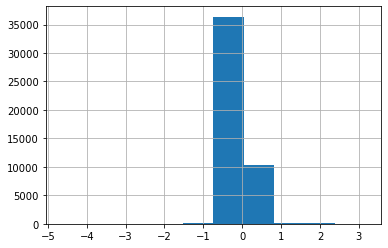

In [5]:
df.logerror.hist()

<AxesSubplot:>

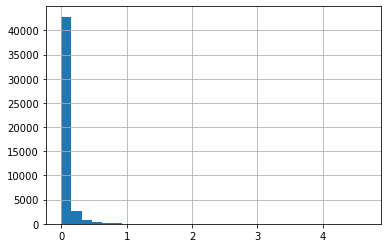

In [6]:
df.abserror.hist(bins=30)

In [7]:
train, validate, test = wrangle.my_split(df)

## is the (abs) log error for large garages significantly larger than the log error of all properties?

In [8]:
train[train.garagesqft > 800].abserror.mean()

0.07269810282348389

In [9]:
train.abserror.mean()

0.0686767455606268

In [10]:
df.shape

(47064, 21)

In [11]:
df.shape

(47064, 21)

<AxesSubplot:>

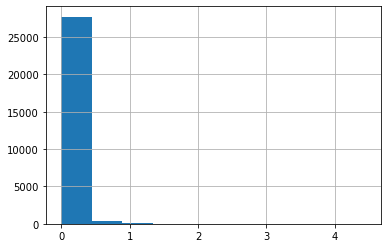

In [12]:
train.abserror.hist()

In [13]:
train['bigerror'] = np.where(train["abserror"] > 1, 1, 0)

In [14]:
big_error = train[train.bigerror == 1]

In [15]:
df.zip

AttributeError: 'DataFrame' object has no attribute 'zip'

In [ ]:
cols = ['bathrooms', 'bedrooms', 'sqft', 'fullbathcnt',
       'latitude', 'garagecarcnt', 'garagesqft', 'longitude', 'lotsize',
       'poolcnt', 'fireplacecnt', 'roomcnt',
       'structuretaxvalue', 'taxvalue', 'landtaxvalue', 'taxamount',
       'logerror', 'age', 'abserror']

for col in cols:
    big_error[col].hist()
    plt.title(col)
    plt.show()

In [ ]:
df.regionidzip.min()

In [16]:
cats = [ 'regionidzip',
       'Los Angeles', 'Orange', 'Ventura', 'garagecarcnt', 'bathrooms', 'bedrooms', 'poolcnt']

nums = ['zipvaluerange', 'bathrooms', 'bedrooms', 'sqft', 'latitude', 'garagecarcnt', 'garagesqft', 'longitude', 'lotsize',
       'poolcnt', 'fireplacecnt', 'tract',  'age', 'taxvalue', 'landtaxvalue', 'taxamount', 'abserror','structuretaxvalue']

In [17]:
for num in nums:
    sns.relplot(data=train, x=num, y='logerror', hue='county')

ValueError: Could not interpret value `zipvaluerange` for parameter `x`

Log error is largest:  
                       - when tax amount is lower (< 5000)
                       
                       - when tax value is low (< 400,000)
                       - when age is 20-60 years
                       - when lot size 5,000-10,000
                       - when sqft is 500-1500 (especially in orange county)
                       - Orange county
                       
                       

In [18]:
df.taxvalue.quantile(.25)

AttributeError: 'DataFrame' object has no attribute 'taxvalue'

In [19]:
zipdict = {}
for zipcode in set(df.regionidzip.values):
    zipcode = int(zipcode)
    zipdict[zipcode] = df[df.regionidzip == zipcode].landtaxvalue.quantile(0.75) - df[df.regionidzip == zipcode].landtaxvalue.quantile(.25).astype(int)

In [20]:
df['zipvaluerange'] = df['regionidzip'].astype(int)

In [21]:
df.zipvaluerange

0        96171
1        97116
2        96480
4        96490
5        96490
         ...  
52314    96978
52315    97099
52316    97078
52317    96330
52319    96325
Name: zipvaluerange, Length: 47064, dtype: int64

In [22]:
df['zipvaluerange'] = df['zipvaluerange'].map(zipdict)

In [23]:
df

,parcelid,bathrooms,bedrooms,sqft,county,latitude,garagesqft,longitude,lotsize,tract,...,landtaxvalue,taxamount,logerror,age,abserror,dollarspersqft,Los Angeles,Orange,Ventura,zipvaluerange
0,12826780,2.00,3.00,"1,762.00",Los Angeles,33.94,0.00,-118.00,"6,347.00","60,375,034.02",...,"382,000.00","6,317.15",0.01,67.00,0.01,296.25,1,0,0,"235,843.25"
1,17239384,2.00,4.00,"1,612.00",Ventura,34.30,560.00,-118.71,"12,105.00","61,110,084.02",...,"16,522.00","1,107.48",0.01,58.00,0.01,41.69,0,0,1,"196,949.00"
2,12773139,1.00,3.00,"1,032.00",Los Angeles,34.04,0.00,-118.04,"5,074.00","60,374,338.02",...,"16,749.00",876.43,0.04,68.00,0.04,48.01,1,0,0,"202,034.50"
4,12768500,3.00,4.00,"1,732.00",Los Angeles,34.04,0.00,-118.00,"3,087.00","60,374,083.02",...,"208,737.00","4,802.63",0.01,19.00,0.01,211.49,1,0,0,"206,586.00"
5,12808835,2.00,3.00,"1,116.00",Los Angeles,34.04,0.00,-117.97,"6,153.00","60,374,071.02",...,"173,585.00","3,554.26",0.06,67.00,0.06,254.32,1,0,0,"206,586.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52314,14297519,3.50,4.00,"3,100.00",Orange,33.63,633.00,-117.87,"4,506.00","60,590,630.07",...,"537,569.00","11,013.72",0.03,24.00,0.03,330.09,0,1,0,"595,971.00"
52315,17052889,1.00,2.00,"1,465.00",Ventura,34.45,0.00,-119.28,"12,647.00","61,110,010.02",...,"376,000.00","5,672.48",0.06,55.00,0.06,316.72,0,0,1,"256,734.00"
52316,14186244,2.00,3.00,"1,243.00",Orange,33.89,440.00,-117.82,"8,432.00","60,590,218.02",...,"479,489.00","6,488.30",0.01,60.00,0.01,454.37,0,1,0,"333,609.00"
52317,12177905,3.00,4.00,"2,376.00",Los Angeles,34.25,0.00,-118.24,"13,038.00","60,373,001.00",...,"36,225.00","1,777.51",-0.10,52.00,0.10,61.09,1,0,0,"358,400.00"


In [24]:
train[train.county=='Ventura'].abserror.mean()

0.054274086624061336

In [25]:
train[train.abserror >= .20].describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"1,816.00","12,614,136.02","1,531,079.65","10,712,007.00","11,538,791.25","12,214,534.00","13,858,210.50","17,296,558.00"
bathrooms,"1,816.00",1.96,0.87,1.00,1.00,2.00,2.00,5.00
bedrooms,"1,816.00",3.05,0.92,1.00,2.00,3.00,4.00,6.00
sqft,"1,816.00","1,642.05",749.97,326.00,"1,107.75","1,459.50","1,980.00","5,081.00"
latitude,"1,816.00",34.02,0.25,33.34,33.86,34.03,34.16,34.71
garagesqft,"1,816.00",114.57,212.40,0.00,0.00,0.00,0.00,"1,419.00"
longitude,"1,816.00",-118.21,0.30,-119.48,-118.37,-118.21,-118.00,-117.58
lotsize,"1,816.00","7,457.65","3,546.72",770.00,"5,456.75","6,694.00","8,340.50","21,517.00"
tract,"1,816.00","60,457,843.14","176,503.68","60,371,012.20","60,372,369.02","60,375,316.02","60,590,111.52","61,110,085.00"
regionidzip,"1,816.00","96,461.55",418.98,"95,982.00","96,109.00","96,349.00","96,965.00","97,344.00"


In [26]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"28,238.00","12,966,885.38","2,314,156.73","10,711,855.00","11,513,600.50","12,607,265.50","14,124,628.50","162,960,814.00"
bathrooms,"28,238.00",2.16,0.82,0.00,2.00,2.00,3.00,5.50
bedrooms,"28,238.00",3.24,0.87,1.00,3.00,3.00,4.00,6.00
sqft,"28,238.00","1,764.28",713.34,152.00,"1,242.00","1,598.00","2,141.00","5,336.00"
latitude,"28,238.00",34.02,0.27,33.34,33.82,34.01,34.18,34.72
garagesqft,"28,238.00",167.06,238.73,0.00,0.00,0.00,430.00,"1,723.00"
longitude,"28,238.00",-118.19,0.35,-119.48,-118.39,-118.14,-117.93,-117.55
lotsize,"28,238.00","7,221.16","3,196.47",236.00,"5,461.00","6,646.00","8,098.00","21,534.00"
tract,"28,238.00","60,493,845.47","206,312.31","60,371,011.10","60,374,013.11","60,376,021.05","60,590,423.28","61,110,091.00"
regionidzip,"28,238.00","96,566.59",417.99,"95,982.00","96,210.00","96,414.00","96,995.00","97,344.00"


Properties with high variance:  LA county, higher age, higher value, larger land, no/smaller garage

<AxesSubplot:>

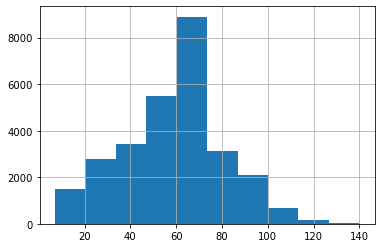

In [27]:
train.age.hist(bins=10)

In [28]:
df['dollarspersqft'] = df.taxvalue / df.sqft

AttributeError: 'DataFrame' object has no attribute 'taxvalue'

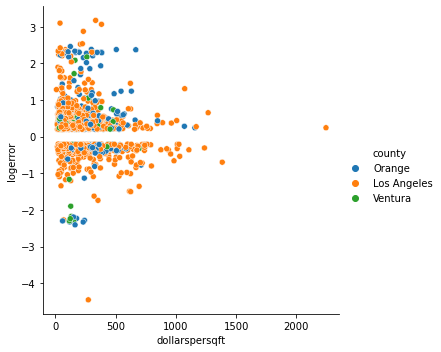

In [29]:
sns.relplot(data=train[(train.dollarspersqft < 2500) & (train.abserror > .2)], x='dollarspersqft', y='logerror', hue='county')

In [30]:
train[train.dollarspersqft >1000].describe()

,parcelid,bathrooms,bedrooms,sqft,latitude,garagesqft,longitude,lotsize,tract,regionidzip,...,landtaxvalue,taxamount,logerror,age,abserror,dollarspersqft,Los Angeles,Orange,Ventura,bigerror
count,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,...,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00
mean,"12,020,482.13",1.31,2.09,926.47,33.94,25.86,-118.32,"5,457.58","60,403,089.85","96,222.60",...,"897,381.56","13,104.26",0.00,82.01,0.12,"1,268.41",0.87,0.13,0.00,0.01
std,"909,203.98",0.51,0.83,270.32,0.17,116.10,0.21,"3,311.08","73,986.95",307.43,...,"239,685.37","3,255.71",0.22,16.65,0.18,340.39,0.34,0.34,0.00,0.11
min,"10,850,309.00",1.00,1.00,152.00,33.50,0.00,-118.51,"1,085.00","60,371,390.01","95,983.00",...,"179,800.00","4,263.53",-0.70,22.00,0.00,"1,005.37",0.00,0.00,0.00,0.00
25%,"11,509,544.25",1.00,2.00,728.50,33.89,0.00,-118.44,"3,345.25","60,372,718.76","96,049.25",...,"765,363.50","10,815.91",-0.06,73.00,0.03,"1,047.55",1.00,0.00,0.00,0.00
50%,"11,568,230.00",1.00,2.00,920.50,33.99,0.00,-118.39,"5,082.50","60,376,202.01","96,117.00",...,"928,984.50","13,338.83",-0.01,80.50,0.06,"1,139.81",1.00,0.00,0.00,0.00
75%,"12,020,860.75",2.00,3.00,"1,152.50",34.07,0.00,-118.34,"6,635.00","60,376,210.04","96,151.75",...,"1,086,000.00","15,534.58",0.06,97.00,0.11,"1,365.31",1.00,0.00,0.00,0.00
max,"14,421,093.00",3.00,5.00,"1,472.00",34.23,748.00,-117.74,"21,517.00","60,590,993.06","96,981.00",...,"1,250,424.00","19,561.22",1.31,119.00,1.31,"2,906.54",1.00,1.00,0.00,1.00


In [31]:
train[(train.dollarspersqft < 2500) & (train.abserror > .2)].describe()

,parcelid,bathrooms,bedrooms,sqft,latitude,garagesqft,longitude,lotsize,tract,regionidzip,...,landtaxvalue,taxamount,logerror,age,abserror,dollarspersqft,Los Angeles,Orange,Ventura,bigerror
count,"1,815.00","1,815.00","1,815.00","1,815.00","1,815.00","1,815.00","1,815.00","1,815.00","1,815.00","1,815.00",...,"1,815.00","1,815.00","1,815.00","1,815.00","1,815.00","1,815.00","1,815.00","1,815.00","1,815.00","1,815.00"
mean,"12,613,210.63",1.96,3.05,"1,642.67",34.02,114.63,-118.21,"7,451.86","60,457,769.98","96,461.27",...,"229,171.79","4,448.04",0.21,69.57,0.46,219.22,0.74,0.21,0.05,0.07
std,"1,530,993.54",0.87,0.92,749.72,0.24,212.45,0.30,"3,539.08","176,524.78",418.92,...,"238,760.51","3,659.34",0.60,22.25,0.43,184.71,0.44,0.41,0.22,0.26
min,"10,712,007.00",1.00,1.00,326.00,33.34,0.00,-119.48,770.00,"60,371,012.20","95,982.00",...,"3,080.00",236.46,-4.45,7.00,0.20,10.04,0.00,0.00,0.00,0.00
25%,"11,538,264.50",1.00,2.00,"1,108.00",33.86,0.00,-118.37,"5,456.50","60,372,366.01","96,109.00",...,"41,828.00","1,718.89",-0.22,58.00,0.24,76.47,0.00,0.00,0.00,0.00
50%,"12,214,103.00",2.00,3.00,"1,460.00",34.03,0.00,-118.21,"6,694.00","60,375,315.03","96,349.00",...,"150,961.00","3,426.37",0.25,69.00,0.31,184.44,1.00,0.00,0.00,0.00
75%,"13,857,163.50",2.00,4.00,"1,980.00",34.16,0.00,-118.01,"8,337.50","60,590,110.51","96,964.50",...,"323,979.00","5,908.35",0.41,83.00,0.48,296.35,1.00,0.00,0.00,0.00
max,"17,296,558.00",5.00,6.00,"5,081.00",34.71,"1,419.00",-117.58,"21,517.00","61,110,085.00","97,344.00",...,"1,239,960.00","19,561.22",3.18,137.00,4.45,"2,244.63",1.00,1.00,1.00,1.00


(array([ 1367.,  4078., 17888., 14409.,  4504.,  2076.,  1028.,   621.,
          586.,   507.]),
 array([  236. ,  2367.3,  4498.6,  6629.9,  8761.2, 10892.5, 13023.8,
        15155.1, 17286.4, 19417.7, 21549. ]),
 <BarContainer object of 10 artists>)

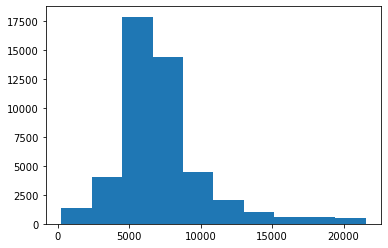

In [32]:
plt.hist(df.lotsize)

In [36]:
df[df.lotsize < df.sqft]

,parcelid,bathrooms,bedrooms,sqft,county,latitude,garagesqft,longitude,lotsize,tract,...,landtaxvalue,taxamount,logerror,age,abserror,dollarspersqft,Los Angeles,Orange,Ventura,zipvaluerange
347,11003421,3.00,2.00,"1,607.00",Los Angeles,34.26,0.00,-118.27,"1,424.00","60,371,013.00",...,"414,213.00","8,611.77",0.12,30.00,0.12,443.98,1,0,0,"199,346.50"
567,17172034,3.00,4.00,"3,027.00",Ventura,34.16,367.00,-119.23,"2,625.00","61,110,036.12",...,"1,188,000.00","16,116.40",0.15,35.00,0.15,472.75,0,0,1,"382,582.00"
712,13859219,4.00,3.00,"2,982.00",Orange,33.67,432.00,-118.01,"2,875.00","60,590,993.10",...,"939,710.00","16,961.36",0.05,17.00,0.05,512.05,0,1,0,"432,336.75"
900,14257166,1.50,2.00,"1,080.00",Orange,33.74,0.00,-117.84,540.00,"60,590,744.08",...,"230,987.00","3,470.28",0.00,58.00,0.00,260.19,0,1,0,"325,161.00"
1141,14394159,1.50,2.00,957.00,Orange,33.57,0.00,-117.71,646.00,"60,590,423.20",...,"250,806.00","3,378.52",0.01,39.00,0.01,344.83,0,1,0,"292,409.50"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51984,14238550,1.50,3.00,"1,602.00",Orange,33.78,462.00,-117.88,873.00,"60,590,760.00",...,"85,331.00","2,406.80",0.02,50.00,0.02,128.86,0,1,0,"265,126.00"
52064,14133173,2.50,3.00,"1,800.00",Orange,33.88,420.00,-117.97,"1,550.00","60,591,106.05",...,"375,988.00","6,011.78",0.02,44.00,0.02,294.44,0,1,0,"267,233.00"
52154,14172985,2.50,4.00,"1,658.00",Orange,33.91,468.00,-117.86,"1,632.00","60,590,117.09",...,"73,035.00","2,795.12",0.01,48.00,0.01,124.47,0,1,0,"286,406.75"
52204,14015449,2.50,3.00,"1,604.00",Orange,33.83,483.00,-118.01,"1,593.00","60,591,102.01",...,"253,356.00","4,618.34",0.02,41.00,0.02,241.90,0,1,0,"205,397.00"
